# Irish land prices predictions
---

Dataset Description:


### importing libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### importing dataset

In [93]:
train_data = pd.read_csv(r"C:\Users\sk\Downloads\land_prices_analysis\ARA02 - Agricultural Land Sales.csv")

In [94]:
pd.set_option('display.max_columns', None)

In [95]:
train_data.head()

,STATISTIC,Statistic,TLIST(A1),Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
0,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,-,State,Euro per Acre,6389.8
1,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE11,Border,Euro per Acre,4685.2
2,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE12,Midland,Euro per Acre,7114.6
3,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE13,West,Euro per Acre,4496.5
4,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE21,Dublin,Euro per Acre,10117.2


In [96]:
train_data.shape

(1728, 10)

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   STATISTIC         1728 non-null   object
 1   Statistic         1728 non-null   object
 2   TLIST(A1)         1728 non-null   int64 
 3   Year              1728 non-null   int64 
 4   C03388V04075      1728 non-null   int64 
 5   Type of Land Use  1728 non-null   object
 6   C02196V02652      1728 non-null   object
 7   Region            1728 non-null   object
 8   UNIT              1728 non-null   object
 9   VALUE             1728 non-null   object
dtypes: int64(3), object(7)
memory usage: 135.1+ KB


### checking missing values

In [98]:
train_data.isnull().sum()

STATISTIC           0
Statistic           0
TLIST(A1)           0
Year                0
C03388V04075        0
Type of Land Use    0
C02196V02652        0
Region              0
UNIT                0
VALUE               0
dtype: int64

### drop missing values

In [99]:
# train_data.dropna(inplace = True)
# train_data.shape

In [100]:
train_data.drop(['TLIST(A1)'],axis=1,inplace=True)


In [101]:
train_data['VALUE']=train_data['VALUE'].replace(['.'],[0])

In [102]:
train_data['VALUE']=train_data['VALUE'].apply(lambda x:float(x))


---

### EDA

##### qualitative features

In [103]:
qual_features=[feature for feature in train_data.columns if len(train_data[feature].unique())<10]
qual_features

['STATISTIC',
 'Statistic',
 'Year',
 'C03388V04075',
 'Type of Land Use',
 'C02196V02652',
 'Region',
 'UNIT']

In [104]:
for feature in qual_features:
    print(feature)
    print(train_data[feature].unique())

STATISTIC
['ARA02C01' 'ARA02C02' 'ARA02C03' 'ARA02C04' 'ARA02C05' 'ARA02C06'
 'ARA02C07' 'ARA02C08']
Statistic
['Median Price per Acre' 'Median Price per Hectare' 'Mean Price per Acre'
 'Mean Price per Hectare' 'Number of Transactions'
 'Volume of Land Sold Acres' 'Volume of Land Sold Hectares'
 'Value of Land Sold']
Year
[2013 2014 2015 2016 2017 2018 2019 2020]
C03388V04075
[1 2 3]
Type of Land Use
['All Land Types' 'Arable Land' 'Permanent Grassland']
C02196V02652
['-' 'IE11' 'IE12' 'IE13' 'IE21' 'IE22' 'IE23' 'IE24' 'IE25']
Region
['State' 'Border' 'Midland' 'West' 'Dublin' 'Mid-East' 'Mid-West'
 'South-East' 'South-West']
UNIT
['Euro per Acre' 'Euro per Hectare' 'Number' 'Euro']


##### showing relationships between qualitative features and flight prices using bar charts

STATISTIC


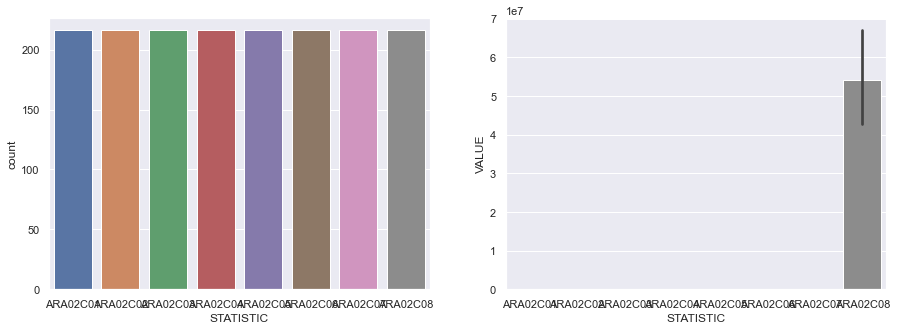

Statistic


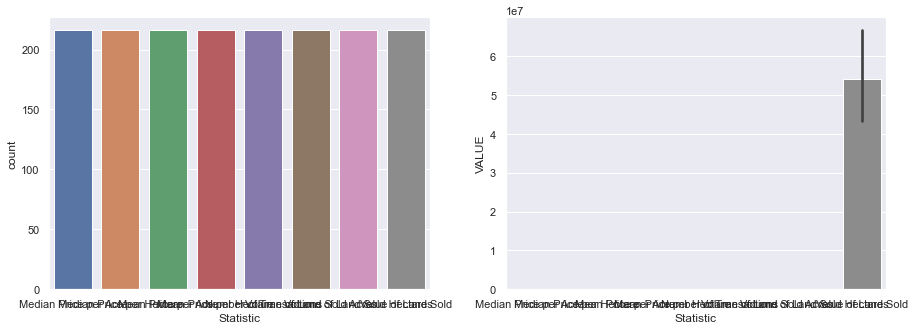

Year


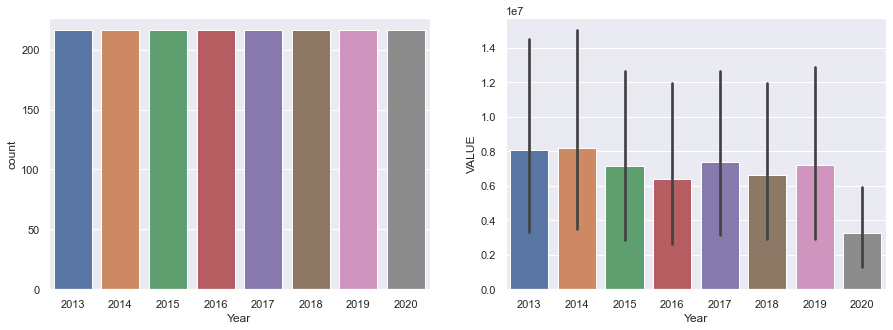

C03388V04075


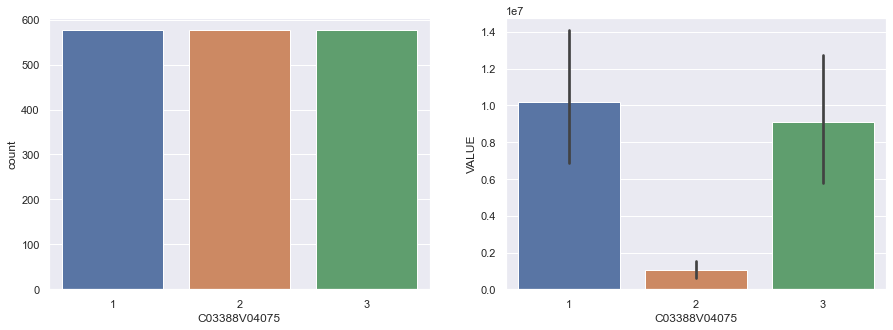

Type of Land Use


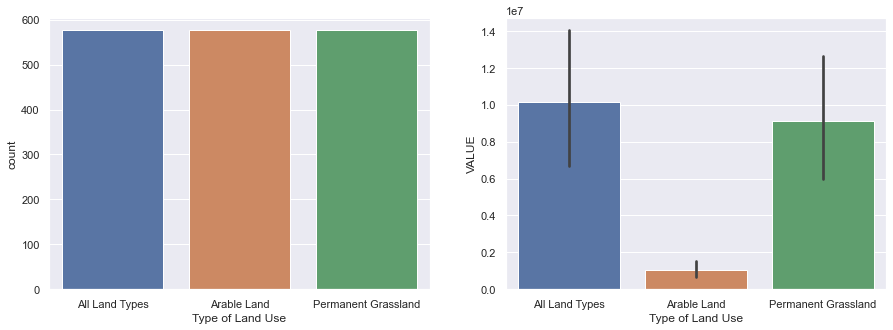

C02196V02652


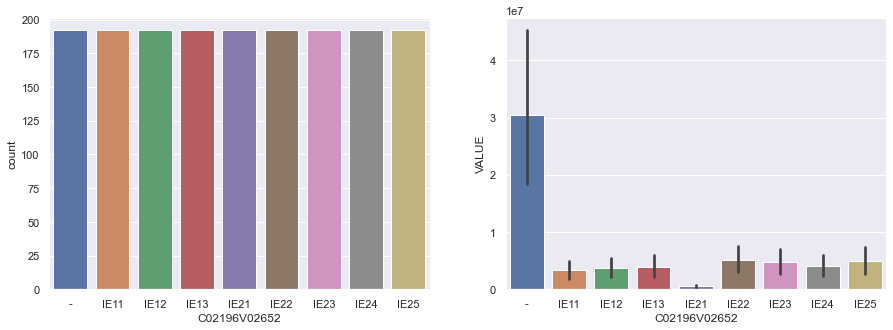

Region


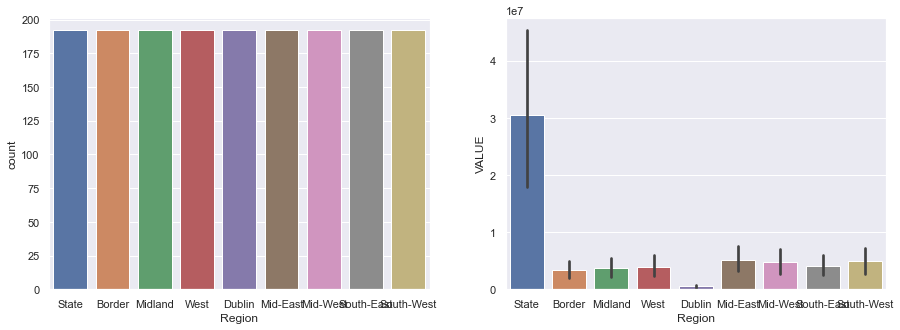

UNIT


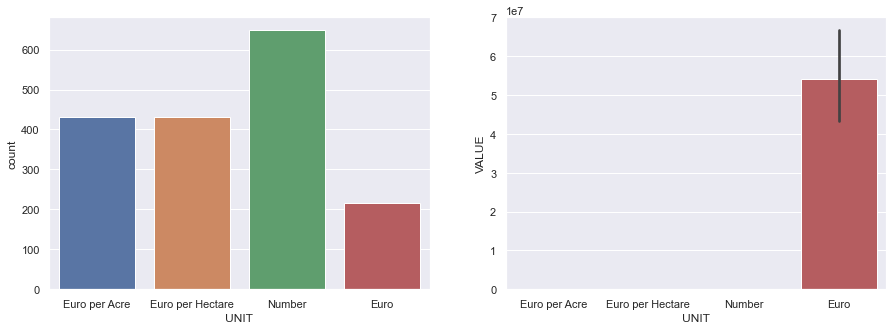

In [105]:
for feature in qual_features:
    print(feature)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature,data=train_data)
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature,y='VALUE',data=train_data)
    plt.show()

##### quantitative features

In [106]:
quant_features=[feature for feature in train_data.columns if train_data[feature].dtype!='O' and 
                len(train_data[feature].unique())>10 ]
quant_features

['VALUE']

##### showing distributions of quantitave features histograms

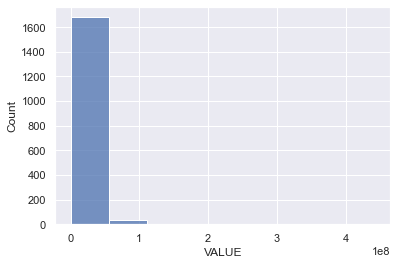

In [107]:
for feature in quant_features:
    sns.histplot(train_data[feature],bins=8)
    plt.show()

### one hot encoding

In [108]:
train_data=pd.get_dummies(train_data, columns = ["STATISTIC"],drop_first=True, prefix="ST")

In [109]:
train_data=pd.get_dummies(train_data, columns = ["Statistic"],drop_first=True, prefix="st")

In [110]:
train_data=pd.get_dummies(train_data, columns = ['Type of Land Use'],drop_first=True, prefix="L_type")

In [111]:
train_data=pd.get_dummies(train_data, columns = ['C02196V02652'],drop_first=True, prefix="C02")

In [112]:
train_data=pd.get_dummies(train_data, columns = ['Region'],drop_first=True, prefix="Reg")

In [113]:
train_data=pd.get_dummies(train_data, columns = ['UNIT'],drop_first=True, prefix="un")

In [114]:
train_data.columns

Index(['Year', 'C03388V04075', 'VALUE', 'ST_ARA02C02', 'ST_ARA02C03',
       'ST_ARA02C04', 'ST_ARA02C05', 'ST_ARA02C06', 'ST_ARA02C07',
       'ST_ARA02C08', 'st_Mean Price per Hectare', 'st_Median Price per Acre',
       'st_Median Price per Hectare', 'st_Number of Transactions',
       'st_Value of Land Sold', 'st_Volume of Land Sold Acres',
       'st_Volume of Land Sold Hectares', 'L_type_Arable Land',
       'L_type_Permanent Grassland', 'C02_IE11', 'C02_IE12', 'C02_IE13',
       'C02_IE21', 'C02_IE22', 'C02_IE23', 'C02_IE24', 'C02_IE25',
       'Reg_Dublin', 'Reg_Mid-East', 'Reg_Mid-West', 'Reg_Midland',
       'Reg_South-East', 'Reg_South-West', 'Reg_State', 'Reg_West',
       'un_Euro per Acre', 'un_Euro per Hectare', 'un_Number'],
      dtype='object')

In [115]:
len(train_data.columns)

38

In [24]:
non_num_features=[feature for feature in train_data.columns if train_data[feature].dtype=='O']
non_num_features

[]

## preparing dataset for regression

#### sipiliting dataset into dependant and independant

## Feature Selection


In [25]:
X = train_data.drop(['VALUE'],axis=1)

In [26]:
X.columns

Index(['Year', 'C03388V04075', 'ST_ARA02C02', 'ST_ARA02C03', 'ST_ARA02C04',
       'ST_ARA02C05', 'ST_ARA02C06', 'ST_ARA02C07', 'ST_ARA02C08',
       'st_Mean Price per Hectare', 'st_Median Price per Acre',
       'st_Median Price per Hectare', 'st_Number of Transactions',
       'st_Value of Land Sold', 'st_Volume of Land Sold Acres',
       'st_Volume of Land Sold Hectares', 'L_type_Arable Land',
       'L_type_Permanent Grassland', 'C02_IE11', 'C02_IE12', 'C02_IE13',
       'C02_IE21', 'C02_IE22', 'C02_IE23', 'C02_IE24', 'C02_IE25',
       'Reg_Dublin', 'Reg_Mid-East', 'Reg_Mid-West', 'Reg_Midland',
       'Reg_South-East', 'Reg_South-West', 'Reg_State', 'Reg_West',
       'un_Euro per Acre', 'un_Euro per Hectare', 'un_Number'],
      dtype='object')

In [27]:
y = train_data['VALUE']
y.head()

0     6389.8
1     4685.2
2     7114.6
3     4496.5
4    10117.2
Name: VALUE, dtype: float64

In [29]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [30]:
print(selection.feature_importances_)

[4.60150063e-02 1.65285330e-03 9.12009602e-11 2.55239826e-11
 7.68140711e-11 1.19130822e-10 4.49160494e-09 4.21105381e-10
 1.35830604e-01 7.73304741e-11 3.01749966e-11 8.63498015e-11
 9.36947318e-11 1.11134130e-01 5.02948030e-09 4.96691782e-10
 2.54386802e-01 1.66844585e-03 2.98242487e-04 1.89317877e-04
 8.59170718e-05 6.21054844e-03 4.95365508e-04 3.94638975e-04
 1.57651530e-04 6.96909747e-04 6.21083080e-03 4.49030338e-04
 3.28025214e-04 1.77272519e-04 1.83166895e-04 9.33730104e-04
 4.32405683e-01 9.57894299e-05 1.65347447e-09 2.49256741e-08
 1.36276252e-09]


#### graph of feature importances for better visualization

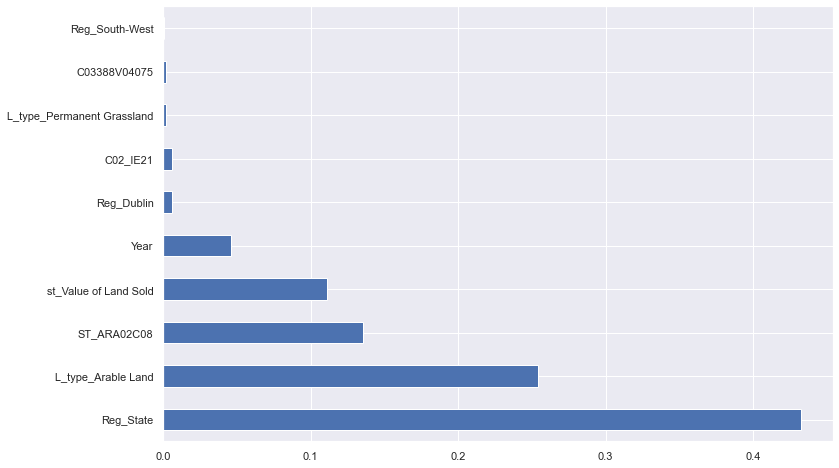

In [69]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


---

#### train test splitting

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 37), (346, 37), (1382,), (346,))

#### Model building

In [34]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor()
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

## predictions

In [37]:
X_test

,Year,C03388V04075,ST_ARA02C02,ST_ARA02C03,ST_ARA02C04,ST_ARA02C05,ST_ARA02C06,ST_ARA02C07,ST_ARA02C08,st_Mean Price per Hectare,st_Median Price per Acre,st_Median Price per Hectare,st_Number of Transactions,st_Value of Land Sold,st_Volume of Land Sold Acres,st_Volume of Land Sold Hectares,L_type_Arable Land,L_type_Permanent Grassland,C02_IE11,C02_IE12,C02_IE13,C02_IE21,C02_IE22,C02_IE23,C02_IE24,C02_IE25,Reg_Dublin,Reg_Mid-East,Reg_Mid-West,Reg_Midland,Reg_South-East,Reg_South-West,Reg_State,Reg_West,un_Euro per Acre,un_Euro per Hectare,un_Number
599,2019,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1201,2017,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
628,2020,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1498,2020,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1263,2019,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2016,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
274,2015,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1206,2017,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
101,2016,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [38]:
arr=np.array(X_test.iloc[5],ndmin=2)

In [39]:
LR.predict(arr)

array([-11105414.94685054])

In [40]:
DTR.predict(arr)

array([16.])

In [41]:
RFR.predict(arr)

array([13.27])

In [42]:
y_test.iloc[5]

15.0

### Evaluation of Linear Regression Model

#### acuracy score

In [43]:
LR.score(X_test, y_test)

0.27222581717028294

In [44]:
DTR.score(X_test, y_test)

0.9733652799839906

In [45]:
RFR.score(X_test, y_test)

0.9790205757024544

#### Mean Absolute Error

In [52]:
LR_pred=LR.predict(X_test)
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test, LR_pred))

MAE: 10104981.757127976


In [53]:
DTR_pred=DTR.predict(X_test)
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, DTR_pred))

MAE: 868915.6286127168


In [54]:
RFR_pred=RFR.predict(X_test)
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, RFR_pred))

MAE: 737795.725410407


#### mean_squared_error

In [55]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, LR_pred))

MSE: 508470053950521.7


In [56]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, DTR_pred))

MSE: 18608735845561.207


In [57]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, RFR_pred))

MSE: 14657580958625.229


#### root mean_squared_error

In [58]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,LR_pred)))

RMSE: 22549280.563923135


In [59]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,DTR_pred)))

RMSE: 4313784.399522211


In [60]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,RFR_pred)))

RMSE: 3828522.033190514


## preparing dataset for classification 

#### sipiliting dataset into dependant and independant

In [67]:
train_data['VALUE'].describe()

count    1.728000e+03
mean     6.780674e+06
std      3.605931e+07
min      0.000000e+00
25%      1.025750e+03
50%      8.524850e+03
75%      1.981183e+04
max      4.426477e+08
Name: VALUE, dtype: float64

In [71]:
train_data['condition']=(train_data['VALUE']>=train_data['VALUE'].median()).astype(int)
train_data['condition']

0       0
1       0
2       0
3       0
4       1
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Name: condition, Length: 1728, dtype: int32

In [72]:
X=train_data.drop(['condition','VALUE'],axis=1)

In [73]:
X

,Year,C03388V04075,ST_ARA02C02,ST_ARA02C03,ST_ARA02C04,ST_ARA02C05,ST_ARA02C06,ST_ARA02C07,ST_ARA02C08,st_Mean Price per Hectare,st_Median Price per Acre,st_Median Price per Hectare,st_Number of Transactions,st_Value of Land Sold,st_Volume of Land Sold Acres,st_Volume of Land Sold Hectares,L_type_Arable Land,L_type_Permanent Grassland,C02_IE11,C02_IE12,C02_IE13,C02_IE21,C02_IE22,C02_IE23,C02_IE24,C02_IE25,Reg_Dublin,Reg_Mid-East,Reg_Mid-West,Reg_Midland,Reg_South-East,Reg_South-West,Reg_State,Reg_West,un_Euro per Acre,un_Euro per Hectare,un_Number
0,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2020,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1724,2020,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1725,2020,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1726,2020,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [75]:
y=train_data['condition']
y

0       0
1       0
2       0
3       0
4       1
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Name: condition, Length: 1728, dtype: int32

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Model building for classification


In [78]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

### predictions

In [80]:
X_test.iloc[10]

Year                               2019
C03388V04075                          3
ST_ARA02C02                           0
ST_ARA02C03                           0
ST_ARA02C04                           0
ST_ARA02C05                           0
ST_ARA02C06                           0
ST_ARA02C07                           1
ST_ARA02C08                           0
st_Mean Price per Hectare             0
st_Median Price per Acre              0
st_Median Price per Hectare           0
st_Number of Transactions             0
st_Value of Land Sold                 0
st_Volume of Land Sold Acres          0
st_Volume of Land Sold Hectares       1
L_type_Arable Land                    0
L_type_Permanent Grassland            1
C02_IE11                              0
C02_IE12                              0
C02_IE13                              0
C02_IE21                              0
C02_IE22                              1
C02_IE23                              0
C02_IE24                              0


In [81]:
arr=np.array(X_test.iloc[10],ndmin=2)

In [82]:
DTC.predict(arr)

array([0])

In [83]:
RFC.predict(arr)

array([0])

In [84]:
y_test.iloc[10]

0

### Evaluating classification model

In [85]:
DTC.score(X_test,y_test)

0.9624277456647399

In [86]:
RFC.score(X_test,y_test)

0.930635838150289

### precision,recall and f1_score

In [87]:
from sklearn import metrics
y_pred=DTC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_pred)
pre=metrics.precision_score(y_test, y_pred)
recall=metrics.recall_score(y_test, y_pred)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.9624277456647399
Precision: 0.9777777777777777
Recall: 0.9513513513513514
F1_score: 0.9643835616438355


In [88]:
from sklearn import metrics
y_pred=RFC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_pred)
pre=metrics.precision_score(y_test, y_pred)
recall=metrics.recall_score(y_test, y_pred)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.930635838150289
Precision: 0.9548022598870056
Recall: 0.9135135135135135
F1_score: 0.9337016574585636


In [89]:
### classification report

In [90]:
from sklearn.metrics import classification_report
y_pred=DTC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       161
           1       0.98      0.95      0.96       185

    accuracy                           0.96       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.96      0.96      0.96       346



In [91]:
from sklearn.metrics import classification_report
y_pred=RFC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       161
           1       0.95      0.91      0.93       185

    accuracy                           0.93       346
   macro avg       0.93      0.93      0.93       346
weighted avg       0.93      0.93      0.93       346

